# Практика визуализации данных - датасет Open Food Facts

## Добро пожаловать на практическое занятие!

После изучения различных техник визуализации на лекции с датасетом Iris, пришло время применить эти навыки к реальному датасету. Сегодня мы будем работать с датасетом **Open Food Facts** - коллаборативной базой данных пищевых продуктов со всего мира.

### Цели обучения:
- Применить техники визуализации, изученные на лекции
- Работать с большим, более сложным реальным датасетом
- Практиковать очистку и предобработку данных
- Создавать осмысленные выводы из данных пищевой промышленности

### О датасете Open Food Facts:
База данных Open Food Facts содержит информацию о пищевых продуктах, включая:
- **Пищевую ценность** (калории, белки, жиры, углеводы)
- **Категории продуктов** (напитки, закуски, молочные продукты и т.д.)
- **Ингредиенты и добавки**
- **Nutri-Score** (рейтинг пищевой ценности A-E)
- **Географическую информацию** (страны, бренды)

### Источник датасета:
- **URL:** https://world.openfoodfacts.org/
- **Файл:** en.openfoodfacts.org.products.tsv
- **Формат:** Значения, разделенные табуляцией (TSV)
- **Размер:** Несколько сотен тысяч продуктов

### Что вы будете практиковать:
1. **Загрузка и исследование данных** - Понимание структуры датасета
2. **Базовая визуализация** - Диаграммы рассеяния, гистограммы, коробчатые диаграммы
3. **Продвинутые техники** - Многомерный анализ, корреляции
4. **Реальные выводы** - Анализ питания, сравнение брендов

## Настройка - Импорт библиотек

**Инструкции:** Выполните ячейку ниже для импорта всех необходимых библиотек для нашего анализа. Это те же библиотеки, которые мы использовали на лекции, плюс несколько дополнительных для работы с большими датасетами.

In [1]:
# Импорт основных библиотек для анализа данных и визуализации
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

# Настройка параметров визуализации
import warnings
warnings.filterwarnings("ignore")
plt.style.use('default')
sns.set_palette("husl")

# Настройки отображения для лучшего вывода
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

print("Все библиотеки успешно импортированы!")
print("Готовы начать практику визуализации данных!")

Все библиотеки успешно импортированы!
Готовы начать практику визуализации данных!


## Упражнение 1: Загрузка данных и первичное исследование

### Инструкции:
1. **Скачайте датасет** с https://world.openfoodfacts.org/ (en.openfoodfacts.org.products.tsv)
2. **Поместите файл** в ту же директорию, что и этот блокнот
3. **Загрузите данные** используя pandas (файл разделен табуляцией, используйте `sep='\t'`)
4. **Исследуйте базовые свойства** датасета

### Ваши задачи:
- Загрузить датасет в pandas DataFrame
- Отобразить первые несколько строк
- Проверить форму (количество строк и столбцов)
- Посмотреть на названия столбцов и типы данных
- Выявить пропущенные значения

In [4]:
# Загрузка датасета Open Pet Food Facts
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t', on_bad_lines='skip', low_memory=True)

# Образец кода для загруженного датасета:
print(f"Размер датасета: {df.shape}")
print(f"Столбцов: {len(df.columns)}")
df.head()

Размер датасета: (4066453, 214)
Столбцов: 214


code                                                url                     creator   created_t      created_datetime  last_modified_t last_modified_datetime last_modified_by  last_updated_t last_updated_datetime  ... water-hardness_100g choline_100g phylloquinone_100g beta-glucan_100g inositol_100g carnitine_100g sulphate_100g nitrate_100g acidity_100g carbohydrates-total_100g
0    2  http://world-en.openfoodfacts.org/product/0000...                     kiliweb  1722606455  2024-08-02T13:47:35Z       1749171851   2025-06-06T01:04:11Z     altroconsumo    1.749172e+09  2025-06-06T01:04:11Z  ...                 NaN          NaN                NaN              NaN           NaN            NaN           NaN          NaN          NaN                      NaN
1    3  http://world-en.openfoodfacts.org/product/0000...  openfoodfacts-contributors  1752485388  2025-07-14T09:29:48Z       1752485389   2025-07-14T09:29:49Z              NaN    1.752485e+09  2025-07-14T09:29:49Z  ...                 NaN          NaN                NaN              NaN           NaN            NaN           NaN          NaN          NaN                      NaN
2    4  http://world-en.openfoodfacts.org/product/0000...                      elcoco  1560176426  2019-06-10T14:20:26Z       1748094869   2025-05-24T13:54:29Z     smoothie-app    1.748095e+09  2025-05-24T13:54:29Z  ...                 NaN          NaN                NaN              NaN           NaN            NaN           NaN          NaN          NaN                      NaN
3    5  http://world-en.openfoodfacts.org/product/0000...  openfoodfacts-contributors  1754314021  2025-08-04T13:27:01Z       1754314023   2025-08-04T13:27:03Z              NaN    1.754314e+09  2025-08-04T13:27:03Z  ...                 NaN          NaN                NaN              NaN           NaN            NaN           NaN          NaN          NaN                      NaN
4    6  http://world-en.openfoodfacts.org/product/0000...                      maldan  1732037972  2024-11-19T17:39:32Z       1749357659   2025-06-08T04:40:59Z     smoothie-app    1.749358e+09  2025-06-08T04:40:59Z  ...                 NaN          NaN                NaN              NaN           NaN            NaN           NaN          NaN          NaN                      NaN

[5 rows x 214 columns]

## Упражнение 2: Очистка данных и предобработка

### Инструкции:
После загрузки датасета вы заметите, что в нем много столбцов и пропущенных значений. Давайте сосредоточимся на данных о пищевой ценности для нашего анализа.

### Ключевые столбцы для анализа:
- `product_name` - Название продукта
- `categories` - Категории продукта
- `countries` - Страны, где продается
- `energy_100g` - Энергия на 100г (ккал)
- `proteins_100g` - Белки на 100г
- `carbohydrates_100g` - Углеводы на 100г
- `fat_100g` - Жиры на 100г
- `sugars_100g` - Сахара на 100г
- `sodium_100g` - Натрий на 100г
- `nutriscore_grade` - Пищевая оценка (A, B, C, D, E)

### Ваши задачи:
1. Выберите только релевантные столбцы для анализа
2. Удалите строки с отсутствующими данными о питании
3. Создайте чистый датасет для визуализации
4. Изучите распределение оценок Nutri-Score

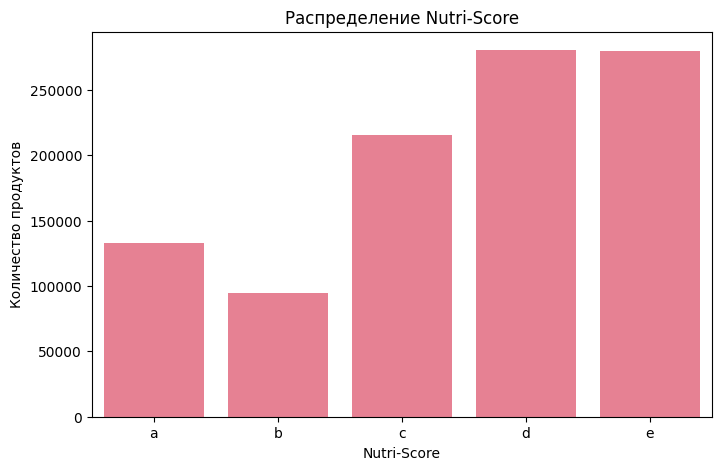

In [6]:
# Выберите релевантные столбцы для анализа питания
nutritional_columns = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g', 
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]

# Выбрать столбцы питания
df_nutrition = df[nutritional_columns]

# Удалить строки с пропущенными значениями
df.dropna(subset=nutritional_columns, inplace=True)

# Отфильтровать нереалистичные выбросы
df = df[(df['energy_100g'] > 0) & (df['proteins_100g'] > 0) & (df['fat_100g'] > 0) & (df['carbohydrates_100g'] >= 0) & (df['sugars_100g'] >= 0) & (df['sodium_100g'] >= 0)]
df = df[(df['energy_100g'] < 4000) & (df['proteins_100g'] < 100) & (df['fat_100g'] < 100) & (df['carbohydrates_100g'] < 100) & (df['sugars_100g'] < 100) & (df['sodium_100g'] < 100)]
df = df[df['nutriscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]

# Проверить распределение Nutri-Score
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='nutriscore_grade', order=['a', 'b', 'c', 'd', 'e'])
plt.title('Распределение Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Количество продуктов')
plt.show()

## Упражнение 3: Базовая визуализация - Применение техник из лекции

Теперь давайте применим техники визуализации, которые вы изучили на лекции! Мы начнем с простых графиков и постепенно увеличим сложность.

### Упражнение 3a: Диаграммы рассеяния - Энергия против содержания белка

**Цель:** Создать диаграмму рассеяния для исследования взаимосвязи между энергетической ценностью и содержанием белка в продуктах.

**Инструкции:**
1. Создайте базовую диаграмму рассеяния используя метод `.plot()` из pandas
2. Создайте улучшенную версию используя `scatterplot()` из seaborn
3. Добавьте цветовое кодирование по оценке Nutri-Score
4. Интерпретируйте результаты: Какие паттерны вы видите?

<Figure size 800x500 with 0 Axes>

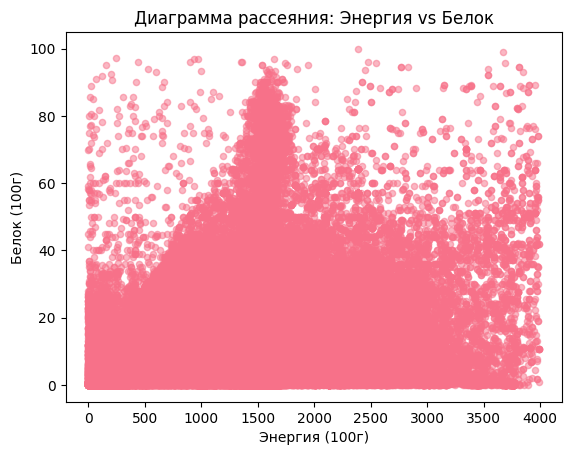

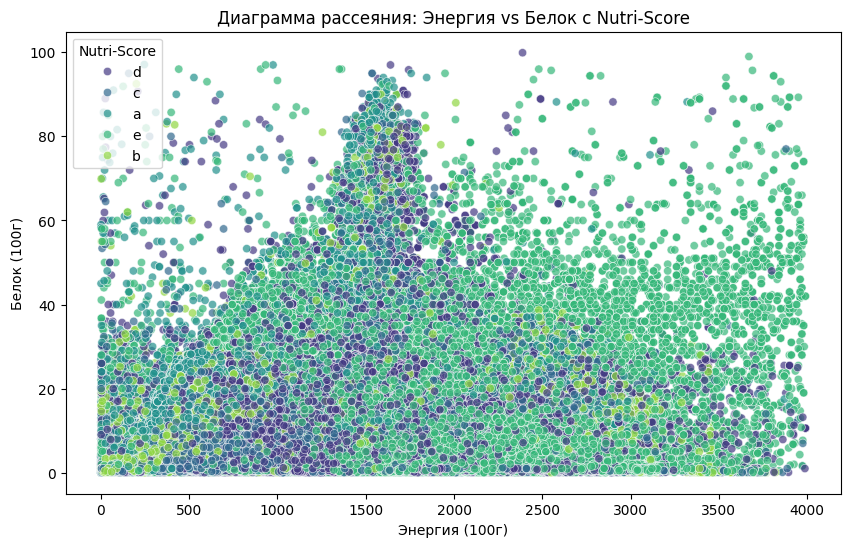

всё очень смешано, но протеиновые продукты имеют в среднем 1500 кДж на 100г


In [ ]:
# Базовая диаграмма рассеяния pandas
plt.figure(figsize=(8, 5))
df.plot.scatter(x='energy_100g', y='proteins_100g', alpha=0.5)
plt.title('Диаграмма рассеяния: Энергия vs Белок')
plt.xlabel('Энергия (100г)')
plt.ylabel('Белок (100г)')
plt.show()

# Улучшенная диаграмма рассеяния с seaborn и цветовым кодированием Nutri-Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy_100g', y='proteins_100g', hue='nutriscore_grade', palette='viridis', alpha=0.7)
plt.title('Диаграмма рассеяния: Энергия vs Белок с Nutri-Score')
plt.xlabel('Энергия (100г)')
plt.ylabel('Белок (100г)')
plt.legend(title='Nutri-Score')
plt.show()

Всё очень смешано, но протеиновые продукты имеют в среднем 1500 кДж на 100г


### Упражнение 3b: Коробчатые диаграммы - Распределение питательных веществ по Nutri-Score

**Цель:** Использовать коробчатые диаграммы для сравнения пищевой ценности между различными оценками Nutri-Score.

**Инструкции:**
1. Создайте коробчатые диаграммы для энергетической ценности по оценке Nutri-Score
2. Создайте коробчатые диаграммы для содержания сахара по оценке Nutri-Score
3. Попробуйте комбинированную технику коробчатая диаграмма + strip plot из лекции
4. Сравните результаты: Как различаются пищевые показатели по оценкам A-E?

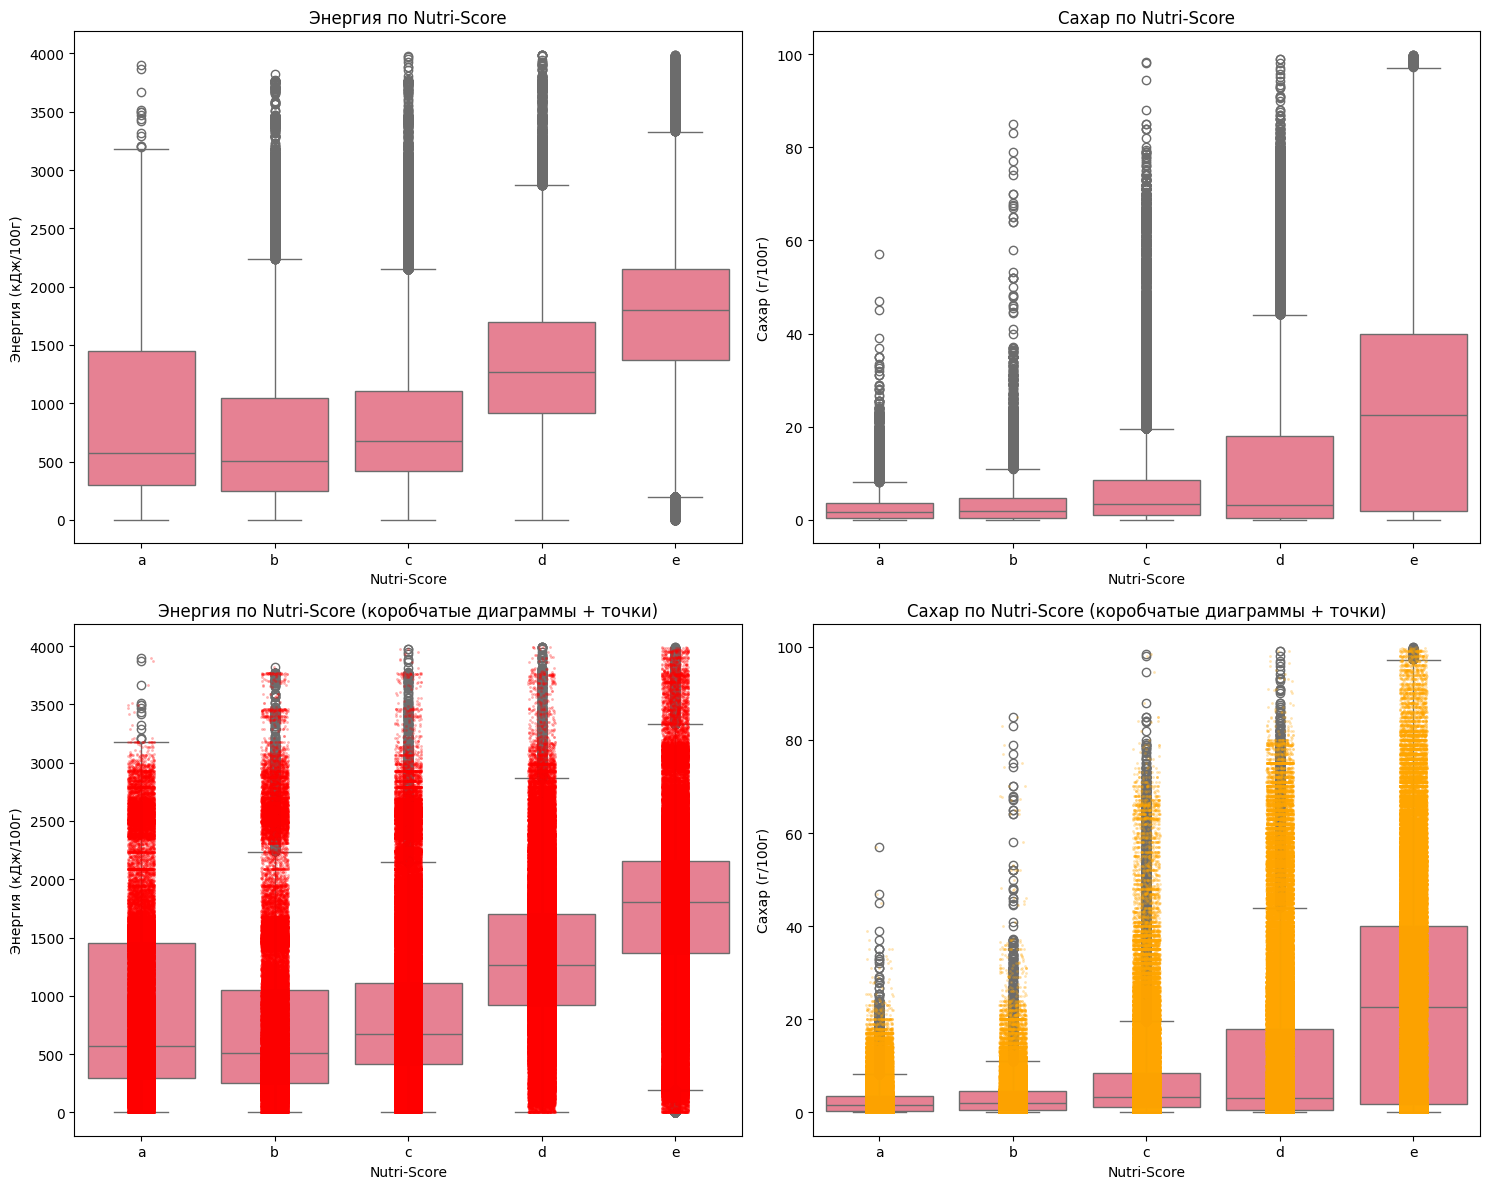

более здоровые продукты имеют минимальное количество сахара при этом не теряя в энергии


In [ ]:
# Коробчатые диаграммы энергии и сахара по Nutri-Score
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Коробчатые диаграммы энергии по Nutri-Score
sns.boxplot(data=df, x='nutriscore_grade', y='energy_100g', order=['a', 'b', 'c', 'd', 'e'], ax=ax1)
ax1.set_title('Энергия по Nutri-Score')
ax1.set_xlabel('Nutri-Score')
ax1.set_ylabel('Энергия (кДж/100г)')

# Коробчатые диаграммы сахара по Nutri-Score
sns.boxplot(data=df, x='nutriscore_grade', y='sugars_100g', order=['a', 'b', 'c', 'd', 'e'], ax=ax2)
ax2.set_title('Сахар по Nutri-Score')
ax2.set_xlabel('Nutri-Score')
ax2.set_ylabel('Сахар (г/100г)')

# Комбинированная техника: коробчатые диаграммы + strip plot для энергии
sns.boxplot(data=df, x='nutriscore_grade', y='energy_100g', order=['a', 'b', 'c', 'd', 'e'], ax=ax3)
sns.stripplot(data=df, x='nutriscore_grade', y='energy_100g', order=['a', 'b', 'c', 'd', 'e'], 
              size=2, alpha=0.3, color='red', ax=ax3)
ax3.set_title('Энергия по Nutri-Score (коробчатые диаграммы + точки)')
ax3.set_xlabel('Nutri-Score')
ax3.set_ylabel('Энергия (кДж/100г)')

# Комбинированная техника: коробчатые диаграммы + strip plot для сахара
sns.boxplot(data=df, x='nutriscore_grade', y='sugars_100g', order=['a', 'b', 'c', 'd', 'e'], ax=ax4)
sns.stripplot(data=df, x='nutriscore_grade', y='sugars_100g', order=['a', 'b', 'c', 'd', 'e'], 
              size=2, alpha=0.3, color='orange', ax=ax4)
ax4.set_title('Сахар по Nutri-Score (коробчатые диаграммы + точки)')
ax4.set_xlabel('Nutri-Score')
ax4.set_ylabel('Сахар (г/100г)')

plt.tight_layout()
plt.show()

Более здоровые продукты имеют минимальное количество сахара при этом не теряя в энергии

### Упражнение 3c: Скрипичные диаграммы и KDE - Анализ распределений

**Цель:** Использовать скрипичные диаграммы и KDE для анализа формы распределений питательных веществ.

**Инструкции:**
1. Создайте скрипичные диаграммы для содержания жиров по оценке Nutri-Score
2. Используйте KDE графики для сравнения распределений белка по оценкам
3. Экспериментируйте с обеими техниками и сравните их выводы
4. Определите какие продукты имеют необычные пищевые профили

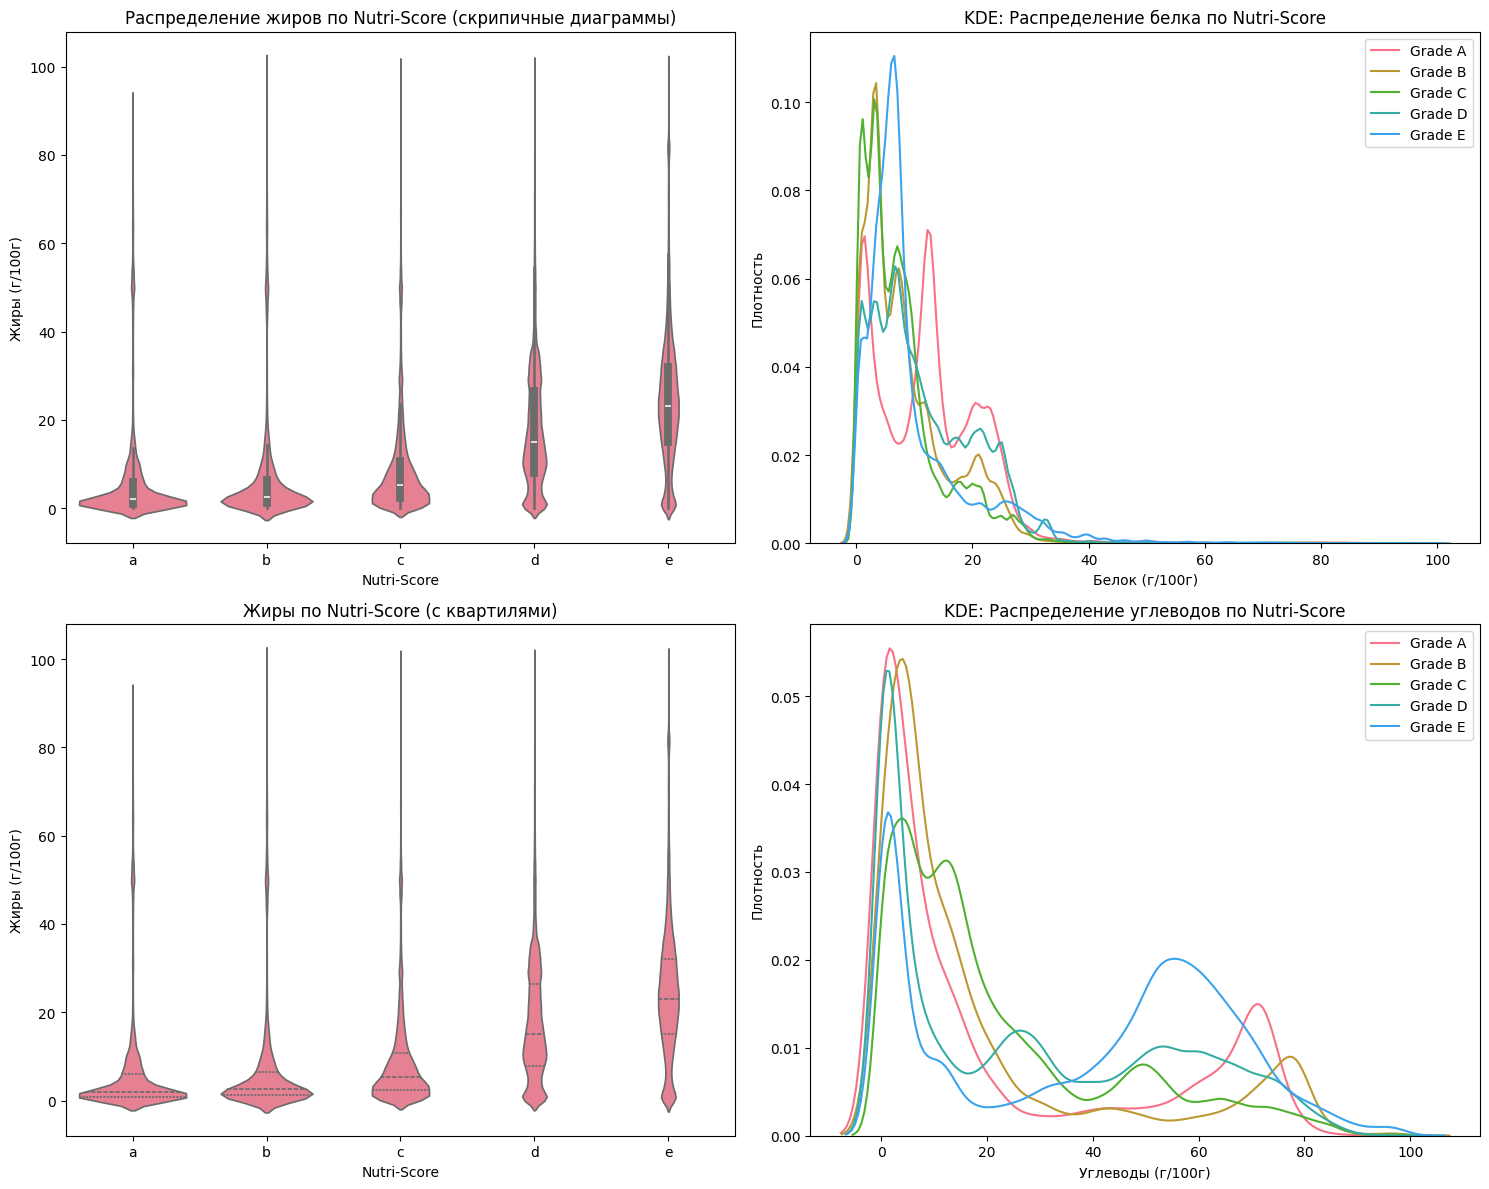

<Figure size 1200x800 with 0 Axes>

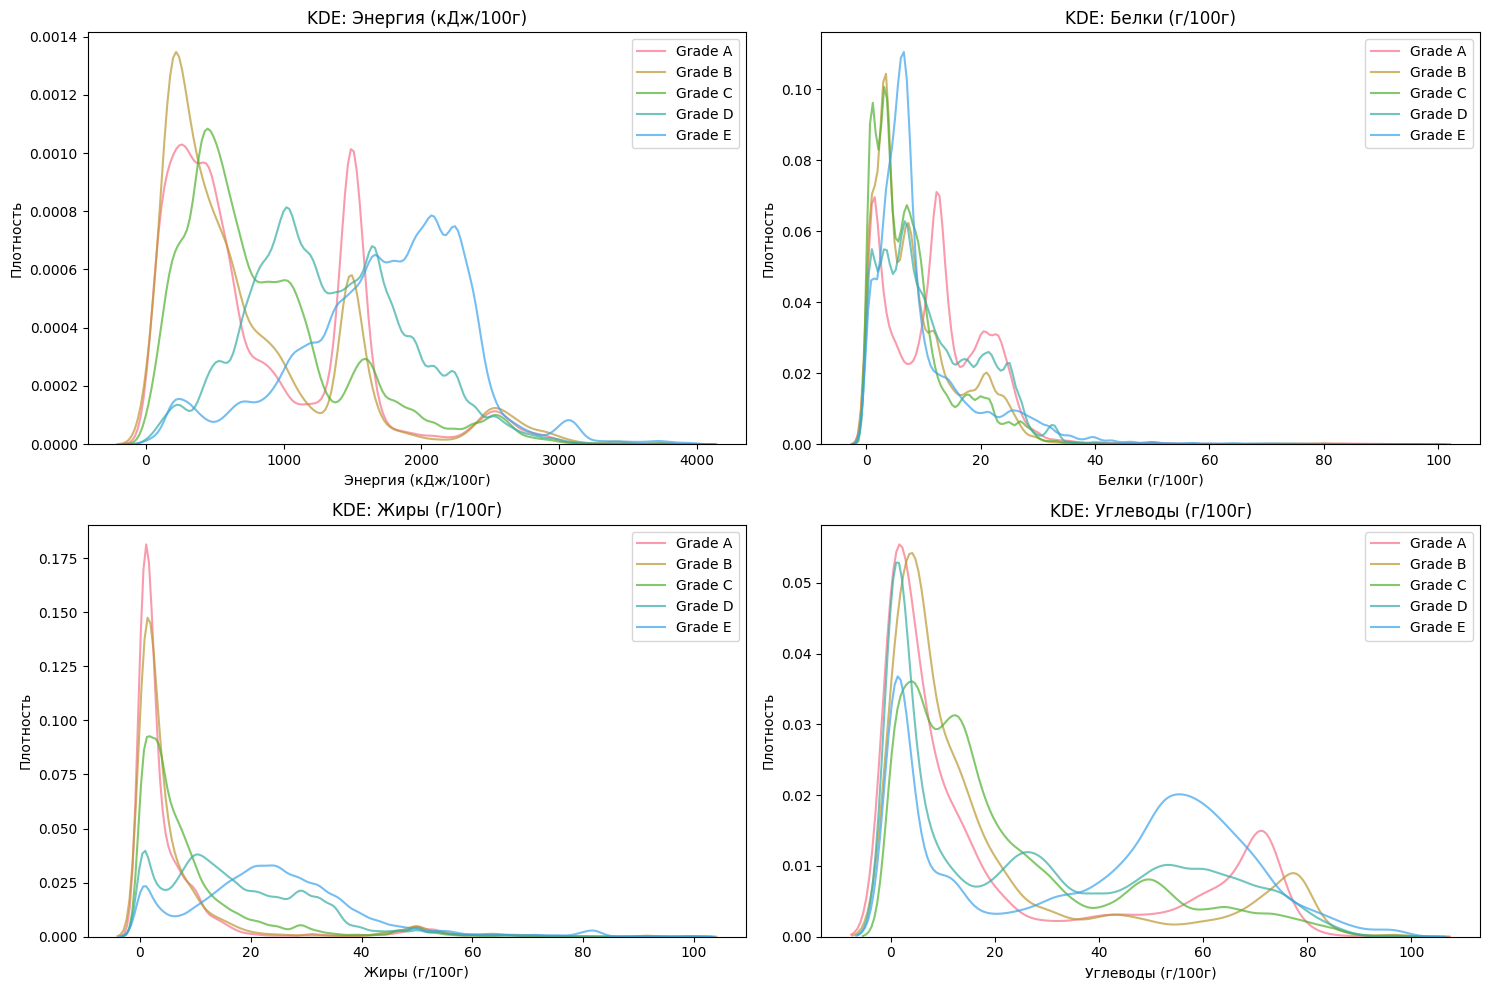

Скрипичные диаграммы показывают форму и плотность распределений
Продукты класса A имеют более узкие распределения для жиров и в среднем наибольшее количество белков
KDE выявляет мультимодальность в некоторых распределениях
Различия между классами наиболее заметны для жиров и сахаров


In [ ]:
# Скрипичные диаграммы для содержания жиров по Nutri-Score
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Скрипичные диаграммы для содержания жиров
sns.violinplot(data=df, x='nutriscore_grade', y='fat_100g', order=['a', 'b', 'c', 'd', 'e'], ax=ax1)
ax1.set_title('Распределение жиров по Nutri-Score (скрипичные диаграммы)')
ax1.set_xlabel('Nutri-Score')
ax1.set_ylabel('Жиры (г/100г)')

# KDE графики для сравнения распределений белка
for grade in ['a', 'b', 'c', 'd', 'e']:
    subset = df[df['nutriscore_grade'] == grade]
    sns.kdeplot(data=subset, x='proteins_100g', label=f'Grade {grade.upper()}', ax=ax2)
ax2.set_title('KDE: Распределение белка по Nutri-Score')
ax2.set_xlabel('Белок (г/100г)')
ax2.set_ylabel('Плотность')
ax2.legend()

# Комбинированные скрипичные диаграммы с внутренними квартилями для жиров
sns.violinplot(data=df, x='nutriscore_grade', y='fat_100g', order=['a', 'b', 'c', 'd', 'e'], 
               inner='quartile', ax=ax3)
ax3.set_title('Жиры по Nutri-Score (с квартилями)')
ax3.set_xlabel('Nutri-Score')
ax3.set_ylabel('Жиры (г/100г)')

# KDE графики для углеводов
for grade in ['a', 'b', 'c', 'd', 'e']:
    subset = df[df['nutriscore_grade'] == grade]
    sns.kdeplot(data=subset, x='carbohydrates_100g', label=f'Grade {grade.upper()}', ax=ax4)
ax4.set_title('KDE: Распределение углеводов по Nutri-Score')
ax4.set_xlabel('Углеводы (г/100г)')
ax4.set_ylabel('Плотность')
ax4.legend()

plt.tight_layout()
plt.show()

# Дополнительный анализ мультимодальных распределений
plt.figure(figsize=(12, 8))

# Создаем subplot для детального KDE анализа всех питательных веществ
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

nutrients = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g']
titles = ['Энергия (кДж/100г)', 'Белки (г/100г)', 'Жиры (г/100г)', 'Углеводы (г/100г)']

for i, (nutrient, title) in enumerate(zip(nutrients, titles)):
    ax = axes[i//2, i%2]
    for grade in ['a', 'b', 'c', 'd', 'e']:
        subset = df[df['nutriscore_grade'] == grade]
        if len(subset) > 0:
            sns.kdeplot(data=subset, x=nutrient, label=f'Grade {grade.upper()}', ax=ax, alpha=0.7)
    ax.set_title(f'KDE: {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Плотность')
    ax.legend()

plt.tight_layout()
plt.show()

1. Скрипичные диаграммы показывают форму и плотность распределений
2. Продукты класса A имеют более узкие распределения для жиров и в среднем наибольшее количество белков
3. KDE выявляет мультимодальность в некоторых распределениях
4. Различия между классами наиболее заметны для жиров и сахаров

## Упражнение 4: Продвинутый многомерный анализ

### Упражнение 4a: Парные графики - Взаимосвязи питательных веществ

**Цель:** Использовать парные графики для исследования взаимосвязей между всеми пищевыми переменными одновременно.

**Инструкции:**
1. Создайте парный график для основных пищевых компонентов (энергия, белок, углеводы, жиры)
2. Используйте цветовое кодирование по оценке Nutri-Score
3. Попробуйте и гистограмму, и KDE на диагонали
4. Определите наиболее сильные корреляции и наиболее разделимые питательные вещества

<Figure size 1200x1000 with 0 Axes>

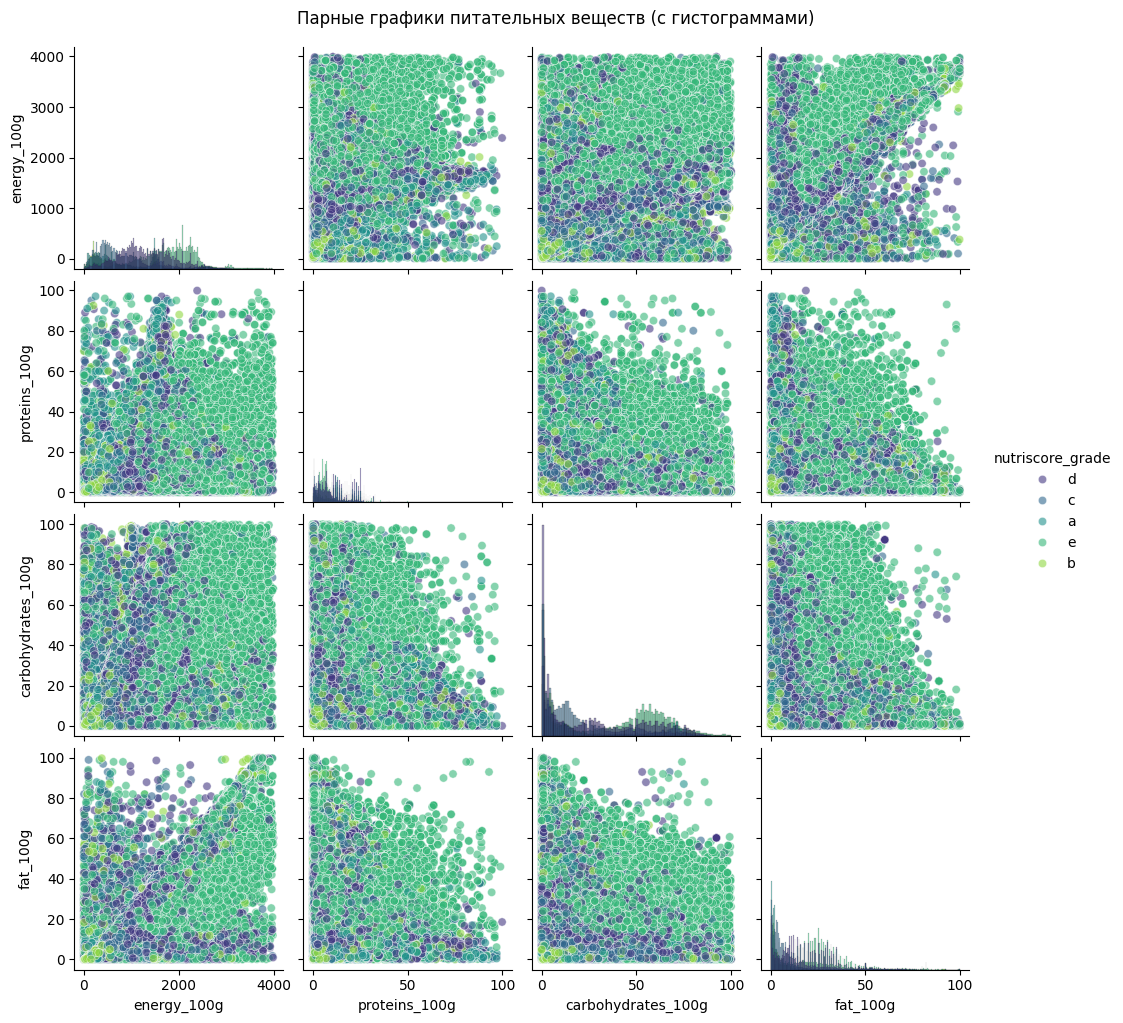

<Figure size 1200x1000 with 0 Axes>

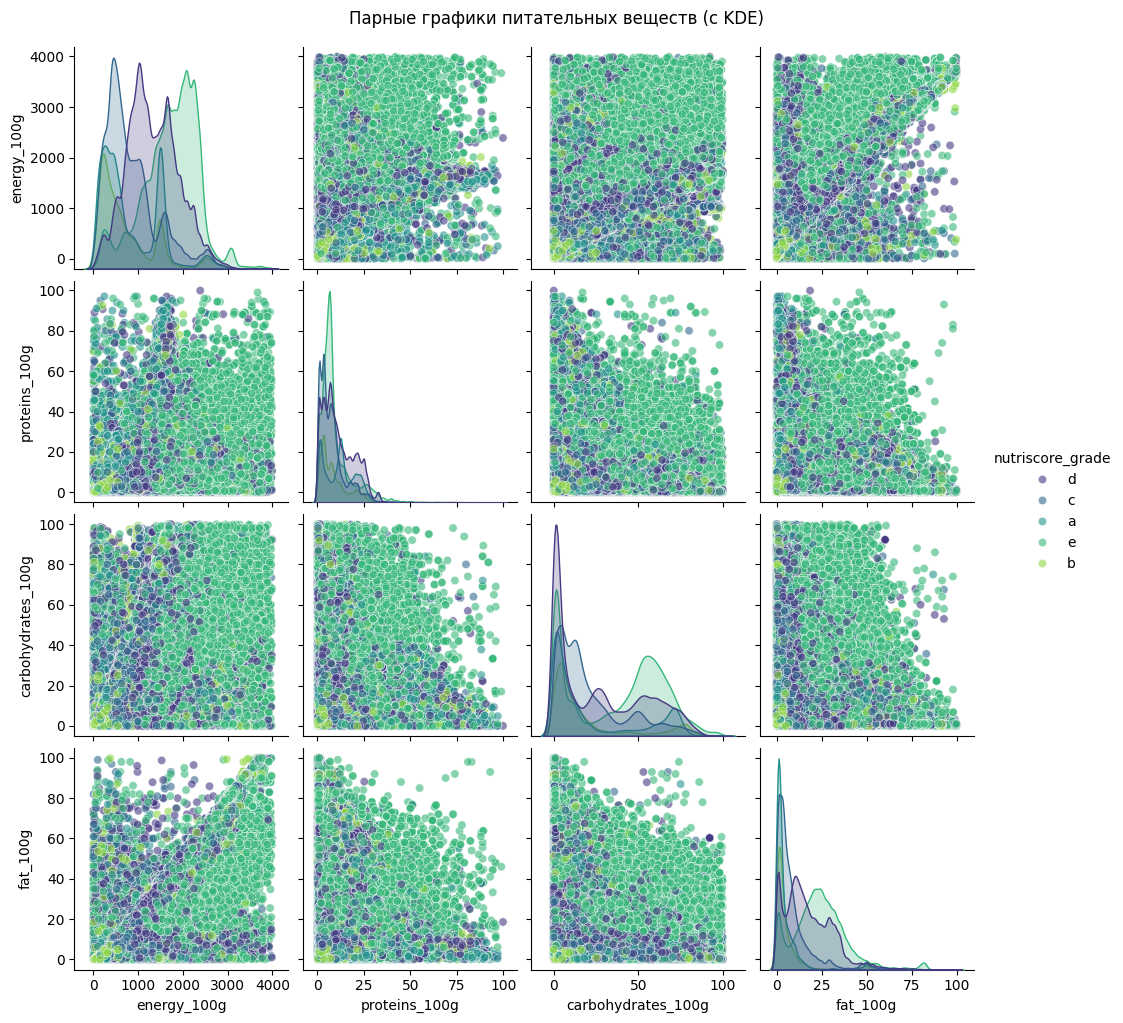

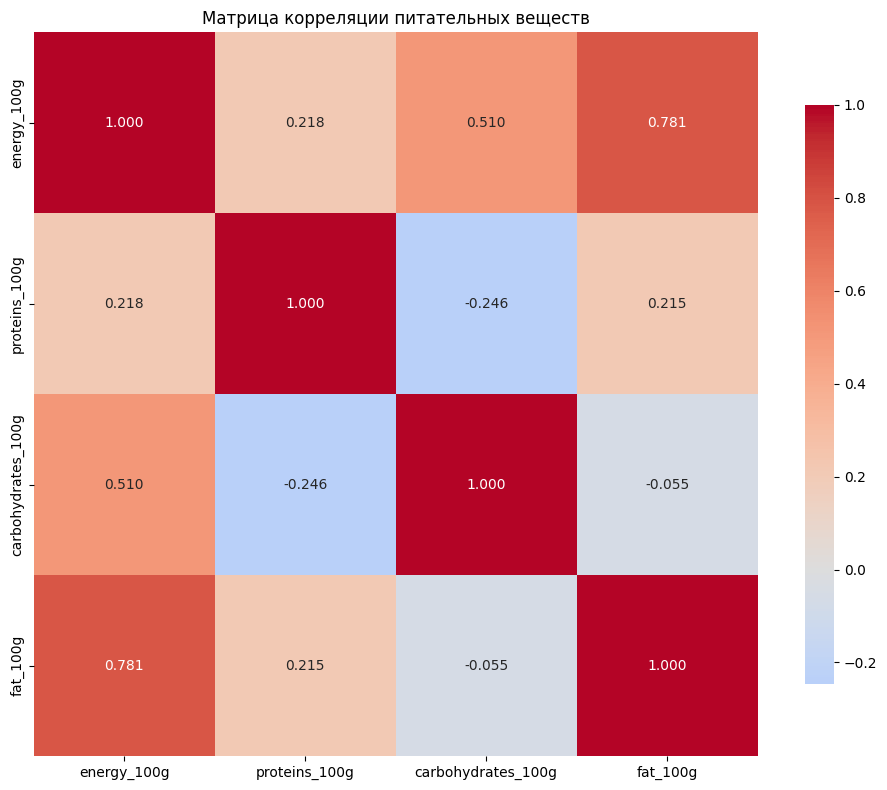

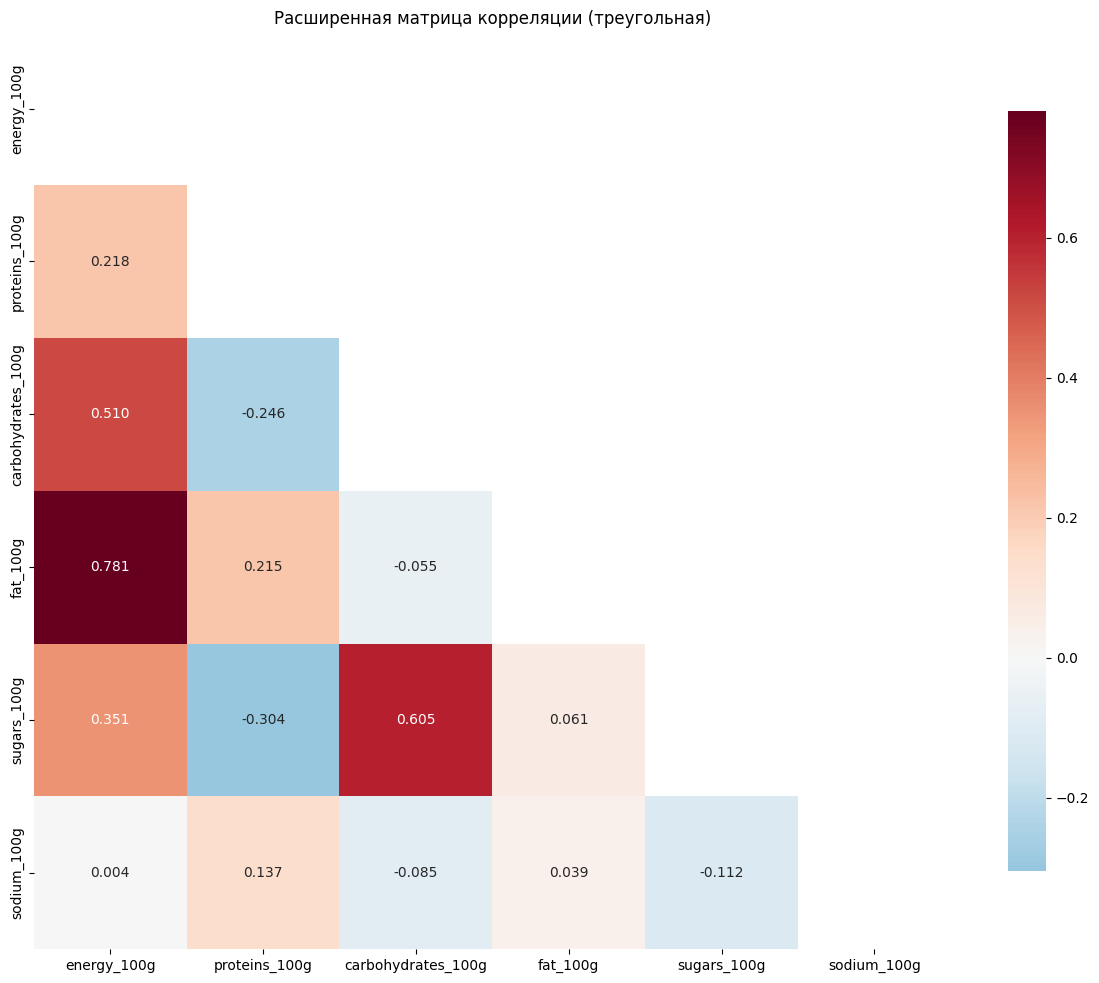

Наиболее сильные положительные корреляции:
  energy_100g ↔ fat_100g: 0.781
  energy_100g ↔ carbohydrates_100g: 0.510
  proteins_100g ↔ carbohydrates_100g: -0.246


In [22]:
# Подготовка данных для парных графиков
nutrition_vars = ['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g']
df_pairs = df[nutrition_vars + ['nutriscore_grade']].copy()

# Создание парного графика с гистограммами на диагонали
plt.figure(figsize=(12, 10))
pair_plot1 = sns.pairplot(df_pairs, hue='nutriscore_grade', palette='viridis', 
                         diag_kind='hist', plot_kws={'alpha': 0.6})
pair_plot1.figure.suptitle('Парные графики питательных веществ (с гистограммами)', y=1.02)
plt.show()

# Создание парного графика с KDE на диагонали
plt.figure(figsize=(12, 10))
pair_plot2 = sns.pairplot(df_pairs, hue='nutriscore_grade', palette='viridis', 
                         diag_kind='kde', plot_kws={'alpha': 0.6})
pair_plot2.figure.suptitle('Парные графики питательных веществ (с KDE)', y=1.02)
plt.show()

# Матрица корреляции для анализа взаимосвязей
plt.figure(figsize=(10, 8))
correlation_matrix = df[nutrition_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляции питательных веществ')
plt.tight_layout()
plt.show()

# Расширенный анализ корреляций с включением всех питательных веществ
extended_nutrition_vars = ['energy_100g', 'proteins_100g', 'carbohydrates_100g', 
                          'fat_100g', 'sugars_100g', 'sodium_100g']
extended_df = df[extended_nutrition_vars].copy()

plt.figure(figsize=(12, 10))
extended_corr = extended_df.corr()
mask = np.triu(np.ones_like(extended_corr, dtype=bool))
sns.heatmap(extended_corr, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Расширенная матрица корреляции (треугольная)')
plt.tight_layout()
plt.show()

# Анализ наиболее сильных корреляций
print("Наиболее сильные положительные корреляции:")
correlation_pairs = []
for i in range(len(nutrition_vars)):
    for j in range(i+1, len(nutrition_vars)):
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append((nutrition_vars[i], nutrition_vars[j], corr_value))

correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in correlation_pairs[:3]:
    print(f"  {var1} ↔ {var2}: {corr:.3f}")

1. Энергия сильно коррелирует с жирами
2. Парные графики показывают различные паттерны для разных Nutri-Score
3. KDE лучше показывает форму распределений на диагонали
4. Продукты класса A образуют отдельные кластеры в многомерном пространстве

### Упражнение 4b: Продвинутые многомерные техники

**Цель:** Применить сложные методы визуализации из лекции: Кривые Эндрюса, Параллельные координаты и RadViz.

**Инструкции:**
1. Используйте Кривые Эндрюса для визуализации пищевых паттернов
2. Создайте график Параллельные координаты для профилей питательных веществ
3. Примените RadViz для просмотра кластеризации питательных веществ
4. Сравните выводы от каждого метода

Подготовка данных завершена. Создание продвинутых визуализаций...


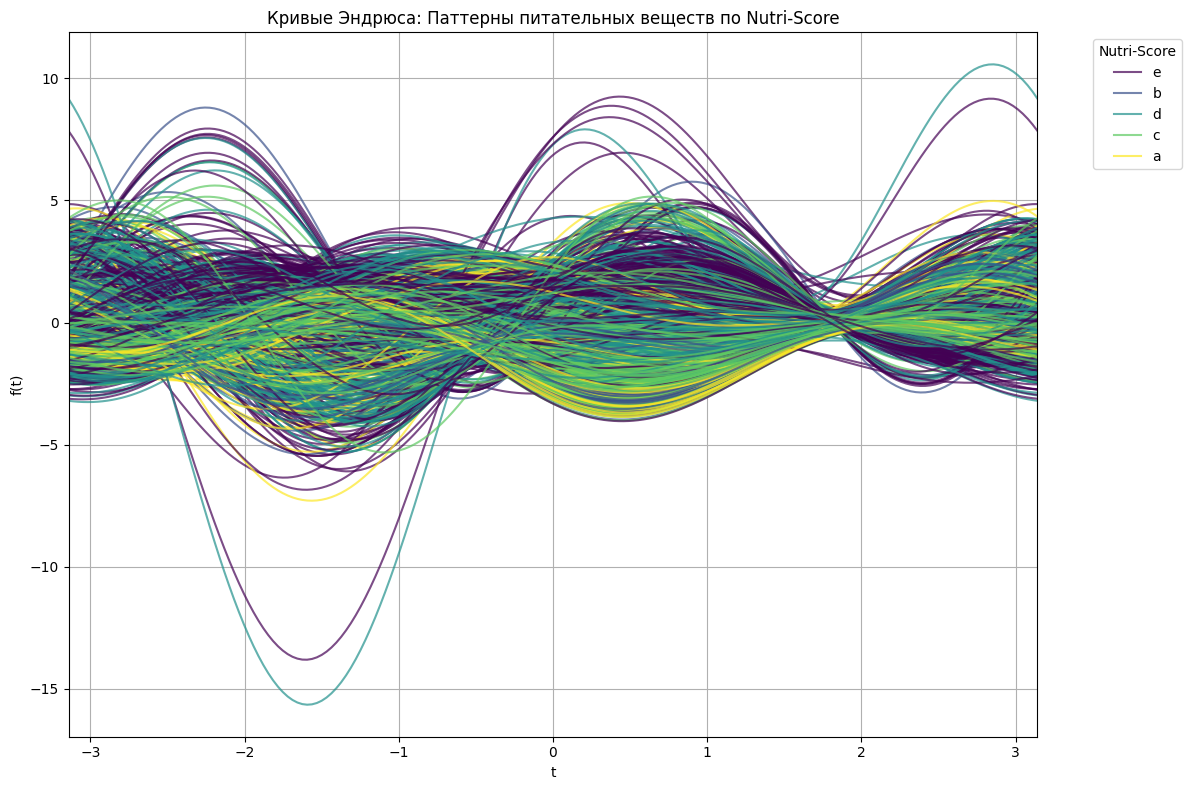

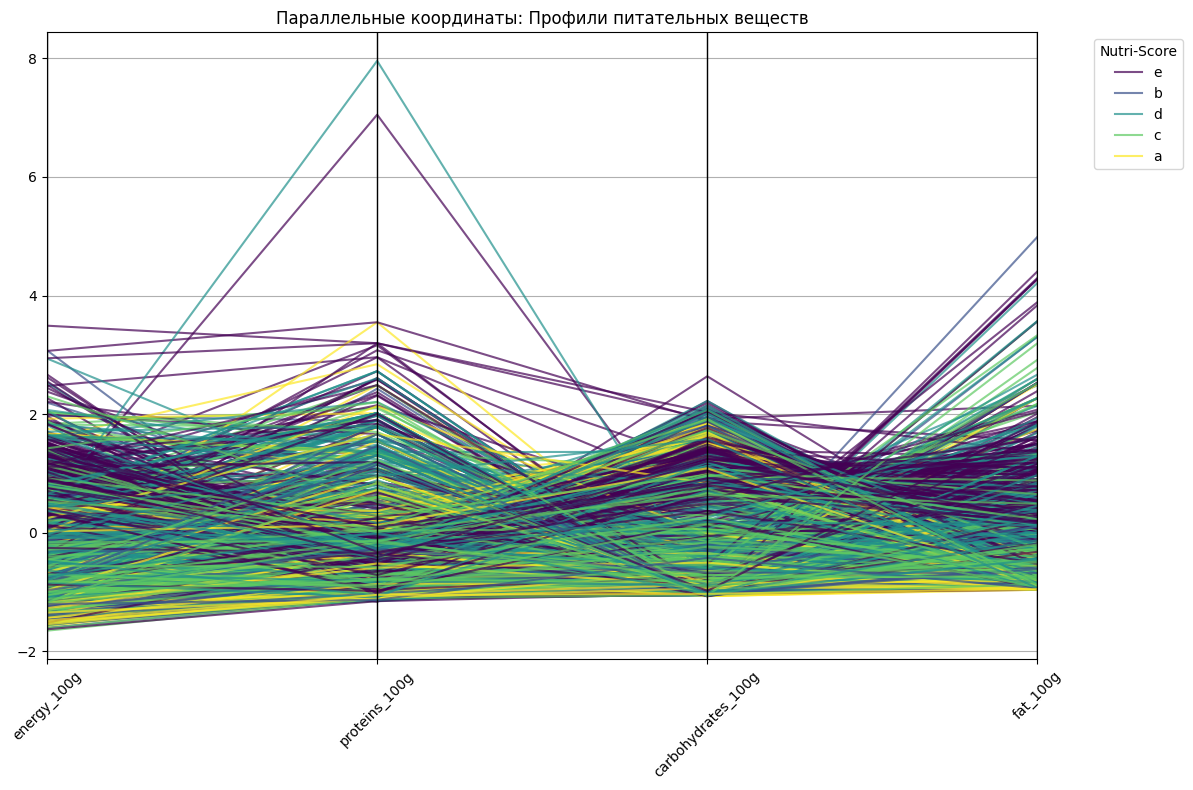

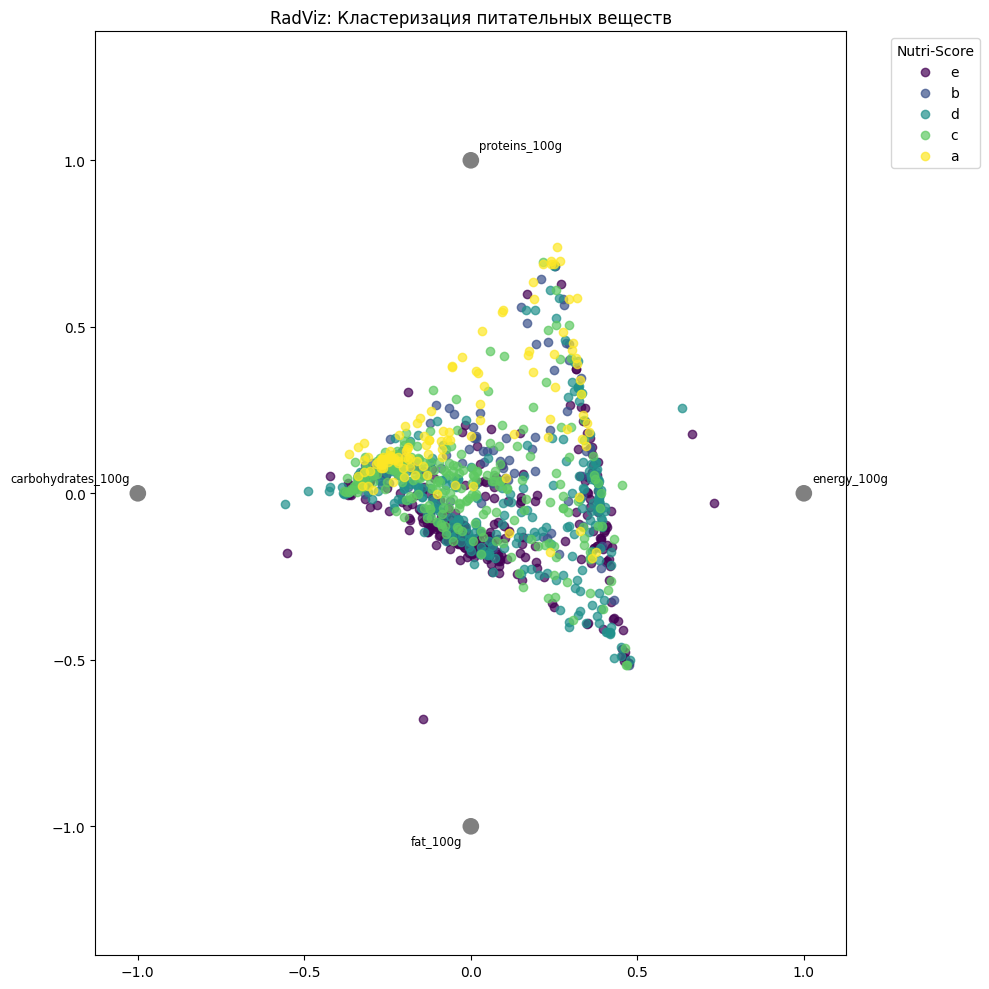

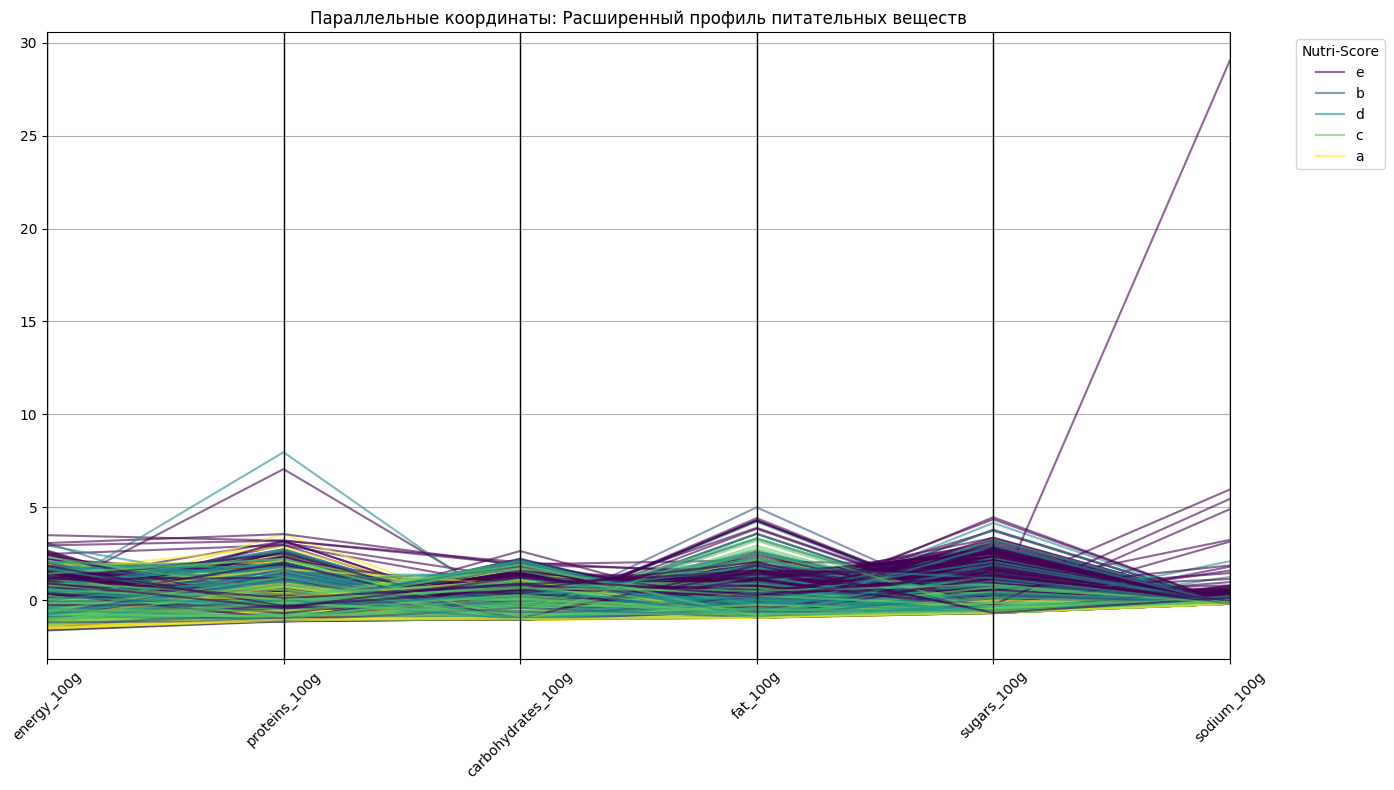

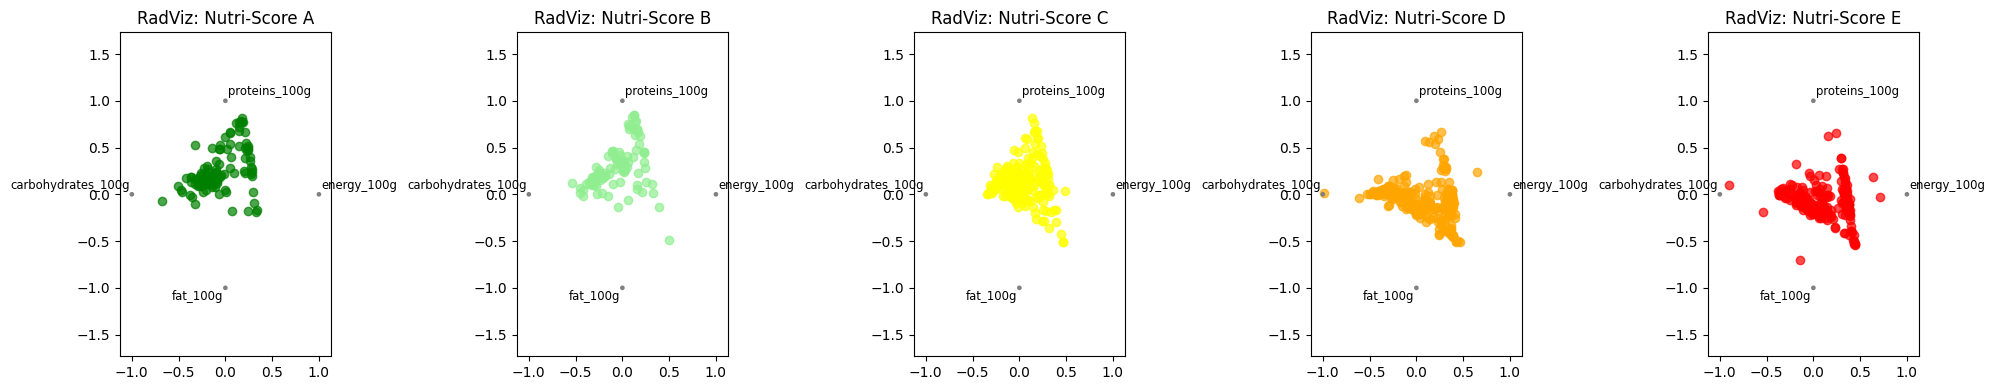

In [23]:
# Выборка для производительности и нормализация данных
df_advanced = df.sample(1000, random_state=42)

# Выберем основные питательные вещества для анализа
feature_columns = ['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g']
df_features = df_advanced[feature_columns + ['nutriscore_grade']].copy()

# Нормализация данных для лучшей визуализации
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = df_features.copy()
df_normalized[feature_columns] = scaler.fit_transform(df_features[feature_columns])

print("Подготовка данных завершена. Создание продвинутых визуализаций...")

# 1. Кривые Эндрюса
plt.figure(figsize=(12, 8))
andrews_curves(df_normalized, 'nutriscore_grade', alpha=0.7, colormap='viridis')
plt.title('Кривые Эндрюса: Паттерны питательных веществ по Nutri-Score')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend(title='Nutri-Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Параллельные координаты
plt.figure(figsize=(12, 8))
parallel_coordinates(df_normalized, 'nutriscore_grade', alpha=0.7, colormap='viridis')
plt.title('Параллельные координаты: Профили питательных веществ')
plt.xticks(rotation=45)
plt.legend(title='Nutri-Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. RadViz
plt.figure(figsize=(10, 10))
radviz(df_normalized, 'nutriscore_grade', alpha=0.7, colormap='viridis')
plt.title('RadViz: Кластеризация питательных веществ')
plt.legend(title='Nutri-Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Дополнительный анализ с расширенным набором признаков
extended_features = ['energy_100g', 'proteins_100g', 'carbohydrates_100g', 
                    'fat_100g', 'sugars_100g', 'sodium_100g']
df_extended = df_advanced[extended_features + ['nutriscore_grade']].copy()

# Нормализация расширенного набора
df_extended_norm = df_extended.copy()
df_extended_norm[extended_features] = scaler.fit_transform(df_extended[extended_features])

# Параллельные координаты с расширенным набором признаков
plt.figure(figsize=(14, 8))
parallel_coordinates(df_extended_norm, 'nutriscore_grade', alpha=0.6, colormap='viridis')
plt.title('Параллельные координаты: Расширенный профиль питательных веществ')
plt.xticks(rotation=45)
plt.legend(title='Nutri-Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Создание интерактивного анализа с подвыборками по Nutri-Score
grades = ['a', 'b', 'c', 'd', 'e']
colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']

# RadViz для каждого класса отдельно
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, (grade, color) in enumerate(zip(grades, colors)):
    subset = df_normalized[df_normalized['nutriscore_grade'] == grade]
    if len(subset) > 10:  # Проверяем, что есть достаточно данных
        radviz(subset, 'nutriscore_grade', ax=axes[i], color=color, alpha=0.7)
        axes[i].set_title(f'RadViz: Nutri-Score {grade.upper()}')
        axes[i].legend().set_visible(False)
    else:
        axes[i].text(0.5, 0.5, f'Недостаточно\nданных для\nкласса {grade.upper()}', 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'RadViz: Nutri-Score {grade.upper()}')

plt.tight_layout()
plt.show()

1. Кривые Эндрюса:
   - Показывают общие паттерны и выбросы
   - Хорошо видны различия между классами A и E
   - Выявляют продукты с необычными профилями

2. Параллельные координаты:
   - Позволяют проследить изменения по всем переменным
   - Четко показывают профили 'здоровых' vs 'нездоровых' продуктов
   - Удобны для выявления паттернов высоких/низких значений

3. RadViz:
   - Показывает кластеризацию похожих продуктов
   - Выявляет продукты с доминирующими компонентами
   - Помогает понять структуру данных в многомерном пространстве

4. Общие выводы:
    - Продукты класса A формируют отчетливые кластеры
    - Класс E имеет высокую вариативность профилей
    - Энергия и жиры - ключевые факторы разделения классов

## Упражнения-вызовы

Готовы к более продвинутым вызовам? Эти упражнения проверят ваше понимание и креативность!

### Вызов 1: Анализ категорий
**Задача:** Проанализируйте как пищевая ценность варьируется между различными категориями продуктов.
- Извлеките и очистите столбец `categories`
- Создайте визуализации, сравнивающие основные категории продуктов
- Найдите какие категории имеют лучшие/худшие пищевые профили

### Вызов 2: Географический анализ  
**Задача:** Исследуйте пищевые различия между странами.
- Разберите столбец `countries`  
- Сравните пищевые стандарты между различными регионами
- Определите страны с самыми здоровыми пищевыми продуктами

### Вызов 3: Собственные выводы
**Задача:** Найдите свой собственный интересный паттерн в данных.
- Выберите аспект данных, который вас интересует
- Примените множественные техники визуализации
- Представьте убедительную историю о ваших находках

### Вызов 4: Интерактивная панель
**Задача:** Создайте интерактивную визуализацию (если знаете Plotly/Bokeh).
- Разрешите фильтрацию по категории, стране или Nutri-Score
- Включите масштабирование и наведение для деталей
- Сделайте это полезным для анализа пищевой промышленности

In [ ]:
# Пространство для упражнений-вызовов
# Используйте эту ячейку и создайте дополнительные ячейки ниже для ваших решений вызовов

# Вызов 1: Пример структуры анализа категорий
# TODO: Реализуйте анализ категорий

# Пример подхода для Вызова 1:
# 1. Извлеките основные категории из столбца categories
# df_clean['main_category'] = df_clean['categories'].str.split(',').str[0]
# 
# 2. Группируйте по категориям и анализируйте средние значения питания
# category_nutrition = df_clean.groupby('main_category')[nutrition_vars].mean()
# 
# 3. Создайте визуализации
# - Тепловая карта категорий против питательных веществ
# - Коробчатые диаграммы сравнивающие категории
# - Радарные диаграммы для профилей категорий

print("💡 Советы для вызовов:")
print("1. Начните с исследования и очистки данных")
print("2. Выберите подходящую визуализацию для вашего вопроса")  
print("3. Всегда интерпретируйте ваши результаты")
print("4. Учитывайте вашу аудиторию при проектировании графиков")
print("5. Не забывайте правильно обрабатывать пропущенные данные")

## Резюме и рефлексия

### Что вы практиковали:
**Загрузка и очистка данных** - Работа с реальными грязными данными  
**Базовая визуализация** - Диаграммы рассеяния, коробчатые диаграммы, скрипичные диаграммы  
**Продвинутые техники** - Парные графики, кривые Эндрюса, параллельные координаты, RadViz  
**Статистический анализ** - KDE, анализ распределений, обнаружение выбросов  
**Многомерный анализ** - Исследование сложных взаимосвязей  

### Ключевые выводы:
1. **Реальные данные грязные** - очистка критически важна для осмысленного анализа
2. **Множественные перспективы важны** - разные графики раскрывают разные выводы  
3. **Цветовое кодирование мощно** - категориальные переменные добавляют глубину анализу
4. **Продвинутые техники** - полезны для сложных многомерных взаимосвязей
5. **Контекст имеет значение** - доменные знания помогают интерпретировать результаты

### Следующие шаги:
- Попробуйте с различными датасетами (данные ВОЗ о здоровье, экономические показатели и т.д.)
- Изучите библиотеки интерактивной визуализации (Plotly, Bokeh)
- Исследуйте статистическое тестирование наряду с визуализацией
- Практикуйте рассказывание историй с данными для презентаций

### Ресурсы для дальнейшего изучения:
- **Документация Seaborn:** https://seaborn.pydata.org/
- **Галерея Matplotlib:** https://matplotlib.org/gallery/
- **Визуализация Pandas:** https://pandas.pydata.org/docs/user_guide/visualization.html
- **Книги по визуализации данных:** "The Grammar of Graphics", "Storytelling with Data"

## Дополнительные учебные материалы

### Если вы хотите углубить знания:

**Книги:**
- "The Grammar of Graphics" - Leland Wilkinson (теоретические основы)
- "Storytelling with Data" - Cole Nussbaumer Knaflic (практические советы)
- "Data Visualization: A Practical Introduction" - Kieran Healy

**Онлайн ресурсы:**
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) - официальное руководство
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/) - примеры графиков
- [Python Graph Gallery](https://python-graph-gallery.com/) - коллекция графиков с кодом

**Видео курсы:**
- Data Visualization with Python на Coursera
- Matplotlib и Seaborn на YouTube
- "Fundamentals of Data Visualization" на edX

**Практические проекты:**
- Анализ данных Kaggle competitions
- Визуализация открытых данных правительства
- Создание дашбордов для бизнес-анализа

### Следующие темы для изучения:
1. **Интерактивная визуализация:** Plotly, Bokeh, Altair
2. **Веб-дашборды:** Streamlit, Dash
3. **Географическая визуализация:** Folium, GeoPandas
4. **Статистическая визуализация:** Корреляционный анализ, регрессия
5. **Большие данные:** Datashader для работы с миллионами точек